<a href="https://colab.research.google.com/github/FatimaALzahrani/Predict-weather-states-based-on-daily-temperature-data/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Daily Temperature Data ⛈️🌡️**

This notebook implements a Markov chain model to predict weather states based on daily temperature data. It is structured as follows:

**1. Data Preparation:** Synthetic data is generated to represent daily temperatures over 30 days.
Data is stored in a structured format using a pandas DataFrame.

**2. Data Cleaning:**

Handles missing values by replacing them with the mean temperature.

Removes duplicate rows to ensure data consistency.

Identifies and removes outliers using the Interquartile Range (IQR) method.

**3. State Classification:** The temperature is divided into three categories: Cold, Mild, and Warm.
A new column (State) is added to classify the weather for each day.

**4. Transition Matrix Calculation:** A Markov transition matrix is built to calculate the probabilities of transitioning from one state to another.

The matrix is normalized to represent probabilities.

**5. Visualizations:**

Several plots are created to support the analysis:

*Temperature over time:* Shows the daily temperature trends.

*State distribution:* Visualizes the frequency of each weather state.

*Transition matrix heatmap:* Displays the probabilities of transitioning between states.


**6. Weather Prediction:** Using the transition matrix, future weather states are predicted for a given number of days.
The prediction process is memoryless, relying only on the current state.

**7. Evaluation:**

The predicted states are compared to the actual states in the dataset.
The error rate is calculated as the proportion of incorrect predictions.

**8. Statistical Analysis:**
Descriptive statistics (e.g., min, max, mean, standard deviation) are computed to summarize the dataset.
Relationships between the data and states are explored.

**9. Saving Results:**
The cleaned dataset is saved as a CSV file for submission.
This ensures reproducibility and compliance with project requirements.

## **Python Libraries📚**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Weather data 🌡️**

In [ ]:
# Generate synthetic dataset (daily temperature🌡️)
# data = {
#     "Date": pd.date_range(start="2024-01-01", periods=30),
#     "Temperature": np.random.randint(5, 35, size=30),  # Random temperatures
# }
# df = pd.DataFrame(data)

In [ ]:
df = pd.read_csv("/content/weather_data.csv")

In [ ]:
df["Temperature"] = df["Temperature_C"]
df["Date"] = df["Date_Time"]

In [ ]:
df

## **Data Cleaning🧹**

In [ ]:
print("\nDataset Statistics:")
print(df.describe())

### a. Handle missing values (if any)

In [ ]:
if df["Temperature"].isnull().sum() > 0:
    df["Temperature"] = df["Temperature"].fillna(df["Temperature"].mean())

### b. Remove duplicate rows (if any)

In [ ]:
df = df.drop_duplicates()

### c. Detect and handle outliers using IQR

In [ ]:
Q1 = df["Temperature"].quantile(0.25)
Q3 = df["Temperature"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["Temperature"] >= lower_bound) & (df["Temperature"] <= upper_bound)]

## **Define temperature states (Cold, Mild, Warm) ❄️🔥**

In [ ]:
def classify_temp(temp):
    if temp < 15:
        return "Cold"
    elif 15 <= temp <= 25:
        return "Mild"
    else:
        return "Warm"

df["State"] = df["Temperature"].apply(classify_temp)

## **Calculate transition probabilities (Markov Transition Matrix) 🧮**

In [ ]:
states = ["Cold", "Mild", "Warm"]
transition_matrix = pd.DataFrame(0, index=states, columns=states)

for (state1, state2) in zip(df["State"][:-1], df["State"][1:]):
    transition_matrix.loc[state1, state2] += 1

# Normalize the matrix (convert counts to probabilities)
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

In [ ]:
transition_matrix

,Cold,Mild,Warm
Cold,0.502759,0.198841,0.298400
Mild,0.504066,0.205573,0.290361
Warm,0.505401,0.198994,0.295606


## **Visualizations 📊**

### a. Temperature Over Time

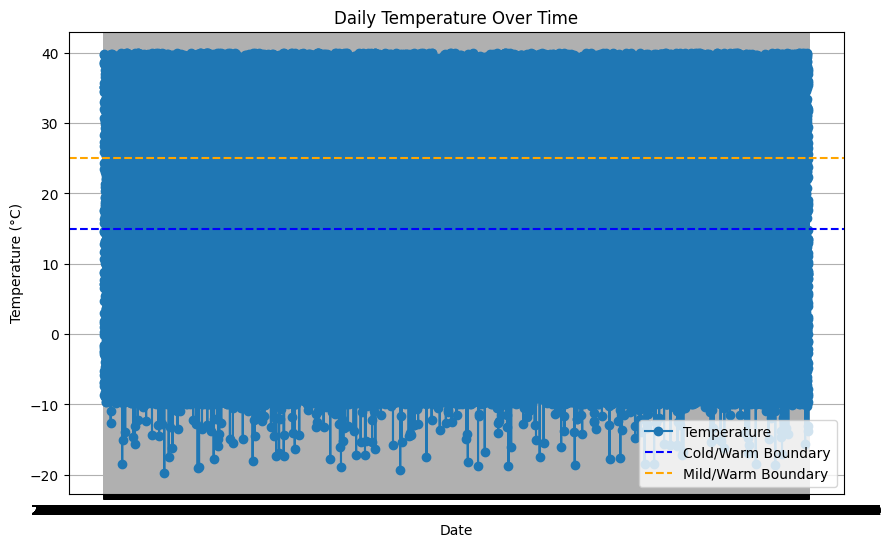

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Temperature"], marker='o', label="Temperature")
plt.axhline(y=15, color='blue', linestyle='--', label="Cold/Warm Boundary")
plt.axhline(y=25, color='orange', linestyle='--', label="Mild/Warm Boundary")
plt.title("Daily Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

### b. State Distribution


<ipython-input-91-6ca18880a4bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="State", data=df, palette="viridis")


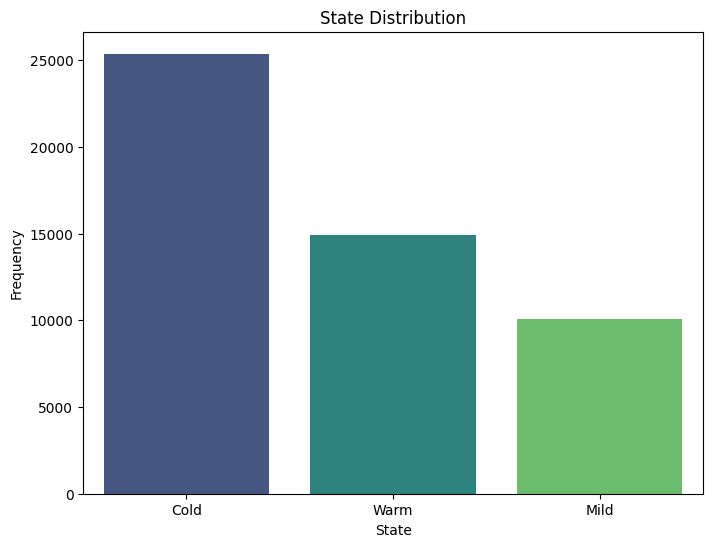

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="State", data=df, palette="viridis")
plt.title("State Distribution")
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

### c. Transition Matrix Heatmap

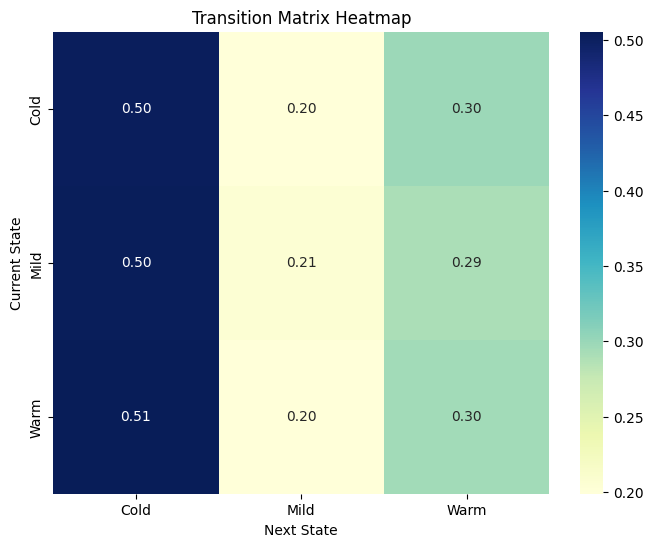

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Transition Matrix Heatmap")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.show()

## **Implement the Markov Chain prediction model 🤖**

In [ ]:
def predict_weather(start_state, days):
    current_state = start_state
    predictions = [current_state]

    for _ in range(days - 1):
        current_state = np.random.choice(
            states, p=transition_matrix.loc[current_state]
        )
        predictions.append(current_state)

    return predictions

## **Start predictions (for 10 days starting from 'Cold')❄️**

In [ ]:
predicted_states = predict_weather("Mild", 10)

## **Evaluate the error rate (compare with actual states)📉**

In [ ]:
actual_states = df["State"][:10]  # First 10 states from the dataset
false_predictions = sum(1 for pred, actual in zip(predicted_states, actual_states) if pred != actual)
error_rate = false_predictions / len(actual_states)

### Display results

In [ ]:
print("Transition Matrix:\n", transition_matrix)
print("\nPredicted States:", predicted_states)
print("\nActual States:", list(actual_states))
print("\nError Rate:", error_rate)

Transition Matrix:
           Cold      Mild      Warm
Cold  0.502759  0.198841  0.298400
Mild  0.504066  0.205573  0.290361
Warm  0.505401  0.198994  0.295606

Predicted States: ['Mild', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Warm', 'Cold', 'Cold', 'Cold']

Actual States: ['Cold', 'Cold', 'Cold', 'Cold', 'Warm', 'Warm', 'Cold', 'Cold', 'Cold', 'Cold']

Error Rate: 0.4


### Save dataset to CSV for submission

In [ ]:
df.to_csv("temperature_dataset.csv", index=False)


Dataset Statistics:
       Temperature_C  Humidity_pct  Precipitation_mm  Wind_Speed_kmh  \
count   50361.000000  50361.000000      50361.000000    50361.000000   
mean       14.794853     60.121012          5.118433       15.020588   
std        14.469207     17.329384          2.947153        8.691356   
min       -19.700813     30.001412          0.000009        0.000334   
25%         2.300761     45.172583          2.586701        7.465440   
50%        14.814426     60.156718          5.121573       15.009565   
75%        27.183842     75.167565          7.628836       22.620917   
max        39.999642     89.999082         14.837122       29.999157   

        Temperature  
count  50362.000000  
mean      14.794853  
std       14.469063  
min      -19.700813  
25%        2.300990  
50%       14.813034  
75%       27.183789  
max       39.999642  


<ipython-input-98-a1a19ec32fad>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Temperature"], palette="coolwarm")


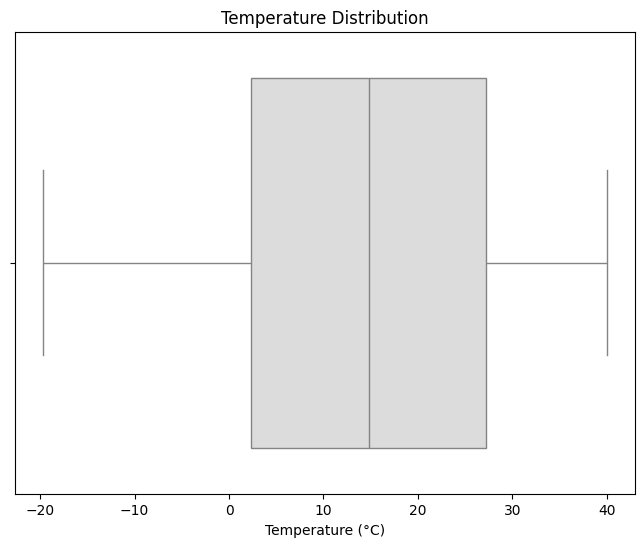

In [ ]:
# Additional statistics


# Boxplot to visualize temperature distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Temperature"], palette="coolwarm")
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.show()